# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_st_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="left")
# Display the data table for preview
mouse_st_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_st_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_st_df[mouse_st_df.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_st_df.loc[mouse_st_df["Mouse ID"]== "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_st_df = mouse_st_df.drop_duplicates()

In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_st_df["Mouse ID"].nunique()

249

In [11]:
mouse_st_df[mouse_st_df.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_st_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = mouse_st_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = mouse_st_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = mouse_st_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = mouse_st_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame ({"mean": mean,
                              "median": median,
                              "variance": variance,
                              "std": std,
                              "sem": sem})

tumor_summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_st_df.groupby('Drug Regimen', as_index=True)["Tumor Volume (mm3)"].agg({"mean",
                                                                              "median", 
                                                                              "var",
                                                                              "std",
                                                                             "sem"
                                                                             })

,std,var,median,mean,sem
Drug Regimen,,,,,
Capomulin,4.994774,24.947764,41.557809,40.675741,0.329346
Ceftamin,6.268188,39.290177,51.776157,52.591172,0.469821
Infubinol,6.567243,43.128684,51.820584,52.884795,0.492236
Ketapril,8.279709,68.553577,53.698743,55.235638,0.603860
Naftisol,8.134708,66.173479,52.509285,54.331565,0.596466
Placebo,7.821003,61.168083,52.288934,54.033581,0.581331
Propriva,6.502160,42.278090,50.909965,52.368318,0.514041
Ramicane,4.846308,23.486704,40.673236,40.216745,0.320955
Stelasyn,7.710419,59.450562,52.431737,54.233149,0.573111


## Bar and Pie Charts

<Axes: >

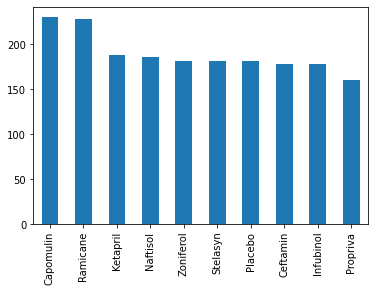

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts_drug = mouse_st_df['Drug Regimen'].value_counts()
counts_drug.plot.bar()


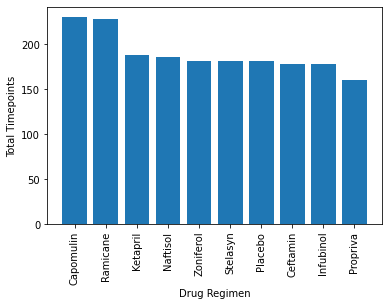

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts_drug.index.values,counts_drug.values)
plt.ylabel('Total Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

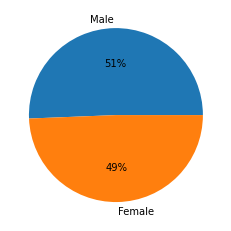

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_pie =mouse_st_df['Sex'].value_counts()
plt.pie(counts_pie.values,labels=counts_pie.index.values,autopct='%1.0f%%')
plt.show()

<Axes: ylabel='Sex'>

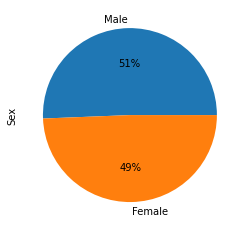

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts_pie.plot.pie(autopct='%1.0f%%')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_st_df.groupby(["Mouse ID"]).max()["Timepoint"]
max_timepoint_df = pd.DataFrame(max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_vol_mouse_df = pd.merge(mouse_st_df, max_timepoint_df, on=("Mouse ID","Timepoint"))
max_vol_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in max_vol_mouse_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        cap.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        ram.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        inf.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        cef.append(row["Tumor Volume (mm3)"])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
reg_df = pd.DataFrame({"Capomulin": cap,
                          "Ramicane": ram,
                          "Infubinol": inf,
                          "Ceftamin": cef})
    
reg_df  
    
    # Determine outliers using upper and lower bounds
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


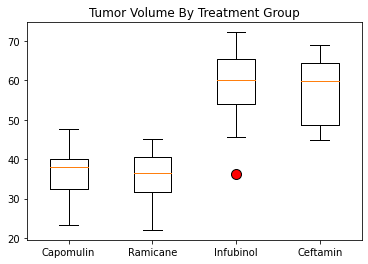

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker = dict(markerfacecolor = 'red', markersize = 10)
fig1, ax1 = plt.subplots()
ax1.boxplot(reg_df , flierprops=marker)
ax1.set_xticklabels(treatments)
ax1.set_title('Tumor Volume By Treatment Group')
plt.show()


## Line and Scatter Plots

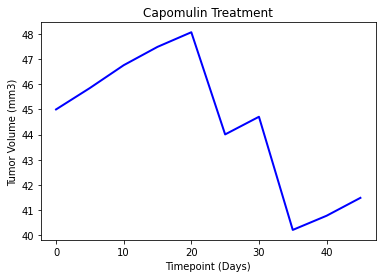

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_st_df.loc[mouse_st_df["Drug Regimen"] == "Capomulin",:]

capomulin_df = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
x_axis = capomulin_df["Timepoint"]
tumvol = capomulin_df["Tumor Volume (mm3)"]

plt.plot(x_axis, tumvol, linewidth=2, color="blue", label="Fahreneit")
plt.title("Capomulin Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


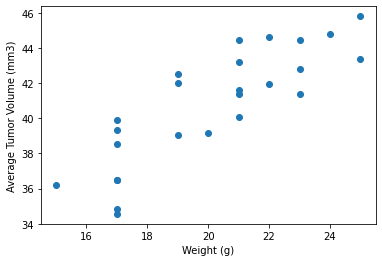

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = mouse_st_df[mouse_st_df['Drug Regimen'] == 'Capomulin']
cap_reg = cap_reg.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

plt.scatter(x='Weight (g)', y='Tumor Volume (mm3)', data=cap_reg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


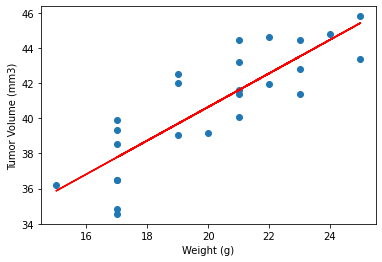

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_c = cap_reg.iloc[:,0]
tumor_c = cap_reg.iloc[:,1]
correlation = st.pearsonr(weight, tumor)
correlation

print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_c, tumor_c)
regress_values = weight_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
